In [86]:
from model import *
from data import *

In [87]:
from importlib import reload  # Python 3.4+ only.
import data
import model as model_functions

reload(data)
reload(model_functions)

<module 'model' from 'D:\\drive\\MyDriveBackup\\9.Semester\\Masterarbeit\\masterarbeit - git\\Käferbäume\\Unet detect trees\\model.py'>

In [93]:
WIDTH = 128
HEIGHT = 128

# checkpoints
filepath="../../../Models/detect-tree/1st-run-128-weights-improvement-{epoch:02d}-{val_loss:.4f}.h5" #-{val_f1:.2f}
#filepath="../../../Models/unet/multi-label-fcDenseNet.h5"
model_checkpoint = ModelCheckpoint(filepath, save_weights_only=False, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [94]:
# data_gen_args = dict(rotation_range=0.2,
#                     width_shift_range=0.05,
#                     height_shift_range=0.05,
#                     shear_range=0.05,
#                     zoom_range=0.05,
#                     horizontal_flip=True,
#                     fill_mode='nearest')
# myGene = trainGenerator(2,'data/membrane/train','image','label',data_gen_args,save_to_dir = None)

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    vertical_flip=True,
                    brightness_range=[0.2,1.8],
                    #validation_split = 0.3,
                    fill_mode="reflect")

myGene = trainGenerator(10 #20
                     ,'../../../Data/Masked Truncs/train/'
                     ,'image'
                     #,'label'
                     ,'mask'
                     ,data_gen_args
                     ,image_color_mode='rgb'
                     ,mask_color_mode='rgb'
                     ,target_size=(WIDTH,HEIGHT)
                     ,save_to_dir = None
                     ,flag_multi_class = True
                     ,num_class = len(COLOR_DICT)
                       )

myGeneValidate = trainGenerator(10 #20
                     ,'../../../Data/Masked Truncs/validate/'
                     ,'image'
                     #,'label'
                     ,'mask'
                     ,data_gen_args
                     ,image_color_mode='rgb'
                     ,mask_color_mode='rgb'
                     ,target_size=(WIDTH,HEIGHT)
                     ,save_to_dir = None
                     ,flag_multi_class = True
                     ,num_class = len(COLOR_DICT)
                               )


In [95]:
from keras.preprocessing import image

def set_sample_image(file_name, mask_name = None):
    if not mask_name:
        mask_name = file_name
        
    sample_image = image.load_img('../../../Data/Masked Truncs/test/image/%s'%file_name, target_size=(HEIGHT, WIDTH))
    sample_image = image.img_to_array(sample_image)
    sample_image /= 255
    #sample_image = np.expand_dims(sample_image, axis=0)

    sample_mask = image.load_img('../../../Data/Masked Truncs/test/mask/%s'%mask_name, target_size=(HEIGHT, WIDTH))
    sample_mask = image.img_to_array(sample_mask)
    sample_mask /= 255
    #sample_mask = np.expand_dims(sample_mask, axis=0)
    
    return sample_image, sample_mask

def create_mask(pred_mask):
    pred_mask = np.argmax(pred_mask, axis=-1)
    pred_mask = pred_mask[..., np.newaxis]
    color_label_matrix = data.get_color_label_matrix(pred_mask[0])
    return color_label_matrix

def show_predictions():
    plt.figure(figsize=(20,5))
    
    plt.subplot(1, 3, 1)
    plt.title('Image')
    plt.imshow(sample_image)
    
    plt.subplot(1, 3, 2)
    plt.title('Ground Truth')
    plt.imshow(sample_mask)
    
    plt.subplot(1, 3, 3)
    plt.title('Predicted')
    pred = model.predict(sample_image[tf.newaxis, ...])
    plt.imshow(create_mask(pred)[:,:,0])# für matshow: , fignum=False
    
    return pred

In [100]:
model = unet(input_size=(WIDTH,HEIGHT,3), nr_classes=len(COLOR_DICT))


In [101]:
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_13 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_289 (Conv2D)             (None, 128, 128, 64) 1792        input_13[0][0]                   
__________________________________________________________________________________________________
conv2d_290 (Conv2D)             (None, 128, 128, 64) 36928       conv2d_289[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_49 (MaxPooling2D) (None, 64, 64, 64)   0           conv2d_290[0][0]                 
___________________________________________________________________________________________

In [102]:
# model.load_weights('current-checkpoint.h5')

In [103]:
#30 min/epoch
model.fit_generator(myGene
                    , validation_data=myGeneValidate
                    , validation_steps=10
                    , steps_per_epoch=20#60
                    , epochs=20
                    , callbacks=[model_checkpoint]) # DisplayCallback()
#13:55

Epoch 1/20
20/20 [==============================] - 383s 19s/step - loss: 0.5904 - accuracy: 0.7102 - mean_io_u_12: 0.2500 - val_loss: 0.7279 - val_accuracy: 0.7321 - val_mean_io_u_12: 0.2500

Epoch 00001: val_loss did not improve from 0.51282
Epoch 2/20
20/20 [==============================] - 368s 18s/step - loss: 0.4950 - accuracy: 0.7208 - mean_io_u_12: 0.2500 - val_loss: 0.4542 - val_accuracy: 0.7617 - val_mean_io_u_12: 0.2500

Epoch 00002: val_loss improved from 0.51282 to 0.45416, saving model to ../../../Models/detect-tree/1st-run-128-weights-improvement-02-0.4542.h5
Epoch 3/20
20/20 [==============================] - 365s 18s/step - loss: 0.4910 - accuracy: 0.7207 - mean_io_u_12: 0.2500 - val_loss: 0.6435 - val_accuracy: 0.7343 - val_mean_io_u_12: 0.2500

Epoch 00003: val_loss did not improve from 0.45416
Epoch 4/20
20/20 [==============================] - 386s 19s/step - loss: 0.4737 - accuracy: 0.7171 - mean_io_u_12: 0.2500 - val_loss: 0.3447 - val_accuracy: 0.7765 - val_mea

In [104]:
model.history.history

{'val_loss': [0.7279432415962219,
  0.45415863394737244,
  0.643481969833374,
  0.34473171830177307,
  0.6030220985412598,
  0.38441401720046997,
  0.6325894594192505,
  0.5346306562423706,
  0.5552184581756592,
  0.40343600511550903,
  0.4471415579319,
  0.6267231702804565,
  0.67277991771698,
  0.4152746796607971,
  0.46532130241394043,
  0.46826353669166565,
  0.49485936760902405,
  0.6733129620552063,
  0.739782989025116,
  0.6697601675987244],
 'val_accuracy': [0.7320965528488159,
  0.7617120146751404,
  0.7343066334724426,
  0.7764526605606079,
  0.7032312154769897,
  0.6841992139816284,
  0.7142614722251892,
  0.730650007724762,
  0.6986029148101807,
  0.7187341451644897,
  0.7363067865371704,
  0.7120556831359863,
  0.724550187587738,
  0.7572375535964966,
  0.7515087723731995,
  0.6464508175849915,
  0.7001287937164307,
  0.8157812356948853,
  0.7012945413589478,
  0.7290155291557312],
 'val_mean_io_u_12': [0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,


In [105]:
model.save('checkpoint-128-20epochs.h5')


In [107]:
model.load_weights('checkpoint-128-20epochs.h5')

In [108]:
#30 min/epoch
model.fit_generator(myGene
                    , validation_data=myGeneValidate
                    , validation_steps=10
                    , steps_per_epoch=20#60
                    , epochs=20
                    , callbacks=[model_checkpoint]) # DisplayCallback()
#16:20

Epoch 1/20
20/20 [==============================] - 404s 20s/step - loss: 0.6417 - accuracy: 0.6820 - mean_io_u_12: 0.2500 - val_loss: 0.5679 - val_accuracy: 0.7369 - val_mean_io_u_12: 0.2500

Epoch 00001: val_loss did not improve from 0.34473
Epoch 2/20
20/20 [==============================] - 383s 19s/step - loss: 0.4915 - accuracy: 0.7148 - mean_io_u_12: 0.2500 - val_loss: 0.5254 - val_accuracy: 0.7275 - val_mean_io_u_12: 0.2500

Epoch 00002: val_loss did not improve from 0.34473
Epoch 3/20
20/20 [==============================] - 353s 18s/step - loss: 0.4432 - accuracy: 0.7749 - mean_io_u_12: 0.2500 - val_loss: 0.9176 - val_accuracy: 0.7291 - val_mean_io_u_12: 0.2500

Epoch 00003: val_loss did not improve from 0.34473
Epoch 4/20
20/20 [==============================] - 369s 18s/step - loss: 0.4677 - accuracy: 0.7537 - mean_io_u_12: 0.2500 - val_loss: 0.5700 - val_accuracy: 0.7400 - val_mean_io_u_12: 0.2500

Epoch 00004: val_loss did not improve from 0.34473
Epoch 5/20
20/20 [======

In [109]:
model.history.history

{'val_loss': [0.5679484605789185,
  0.5253928303718567,
  0.9175788164138794,
  0.5700284242630005,
  0.28077641129493713,
  0.3904404044151306,
  0.3841012418270111,
  0.48128682374954224,
  0.5250037312507629,
  0.46573227643966675,
  0.4444783627986908,
  0.3218557834625244,
  0.4763941764831543,
  0.4375789165496826,
  0.38545671105384827,
  0.48294124007225037,
  0.3913308084011078,
  0.6822315454483032,
  0.6702091097831726,
  0.40072447061538696],
 'val_accuracy': [0.736909806728363,
  0.7274572849273682,
  0.7291210889816284,
  0.739973783493042,
  0.7447460889816284,
  0.7161456346511841,
  0.7423589825630188,
  0.7963970899581909,
  0.7122418284416199,
  0.7651708722114563,
  0.7421783208847046,
  0.7588165402412415,
  0.701586902141571,
  0.773423433303833,
  0.7943109273910522,
  0.7836297750473022,
  0.7242968678474426,
  0.7851733565330505,
  0.7779150605201721,
  0.7944158911705017],
 'val_mean_io_u_12': [0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.

In [110]:
model.save('checkpoint-128-40epochs.h5')


In [112]:
#30 min/epoch
model.fit_generator(myGene
                    , validation_data=myGeneValidate
                    , validation_steps=10
                    , steps_per_epoch=20#60
                    , epochs=20
                    , callbacks=[model_checkpoint]) # DisplayCallback()
#13:55

Epoch 1/20
20/20 [==============================] - 360s 18s/step - loss: 0.4617 - accuracy: 0.8182 - mean_io_u_12: 0.2500 - val_loss: 1.4138 - val_accuracy: 0.6795 - val_mean_io_u_12: 0.2500

Epoch 00001: val_loss did not improve from 0.28078
Epoch 2/20
20/20 [==============================] - 344s 17s/step - loss: 0.4212 - accuracy: 0.8101 - mean_io_u_12: 0.2500 - val_loss: 1.5108 - val_accuracy: 0.7275 - val_mean_io_u_12: 0.2500

Epoch 00002: val_loss did not improve from 0.28078
Epoch 3/20
20/20 [==============================] - 344s 17s/step - loss: 0.3596 - accuracy: 0.8520 - mean_io_u_12: 0.2500 - val_loss: 0.8114 - val_accuracy: 0.7247 - val_mean_io_u_12: 0.2500

Epoch 00003: val_loss did not improve from 0.28078
Epoch 4/20
20/20 [==============================] - 343s 17s/step - loss: 0.3638 - accuracy: 0.8504 - mean_io_u_12: 0.2500 - val_loss: 0.6060 - val_accuracy: 0.7647 - val_mean_io_u_12: 0.2500

Epoch 00004: val_loss did not improve from 0.28078
Epoch 5/20
20/20 [======

In [113]:
model.history.history

{'val_loss': [1.4137871265411377,
  1.5107839107513428,
  0.8114255666732788,
  0.6060314178466797,
  0.359984427690506,
  0.34425732493400574,
  0.3414061665534973,
  0.2291063815355301,
  0.5470634698867798,
  1.3138923645019531,
  0.41396021842956543,
  0.506820559501648,
  0.7234929800033569,
  0.5652998685836792,
  0.7074782848358154,
  0.9805097579956055,
  0.41786080598831177,
  0.5759143233299255,
  0.347741961479187,
  0.3299082815647125],
 'val_accuracy': [0.6794525384902954,
  0.7275012135505676,
  0.7247485518455505,
  0.7647027373313904,
  0.7887524366378784,
  0.7677148580551147,
  0.7682629227638245,
  0.7940210103988647,
  0.831681489944458,
  0.7654138207435608,
  0.7953784465789795,
  0.7619214057922363,
  0.7984246611595154,
  0.7450567483901978,
  0.7698065042495728,
  0.7447570562362671,
  0.7455071806907654,
  0.7925561666488647,
  0.8056250214576721,
  0.7958667278289795],
 'val_mean_io_u_12': [0.2500007450580597,
  0.2500007450580597,
  0.2500007450580597,
  0.2

In [114]:
model.save('checkpoint-128-60epochs.h5')


In [115]:
#30 min/epoch
model.fit_generator(myGene
                    , validation_data=myGeneValidate
                    , validation_steps=10
                    , steps_per_epoch=20#60
                    , epochs=10
                    , callbacks=[model_checkpoint]) # DisplayCallback()
#13:55

Epoch 1/10
20/20 [==============================] - 354s 18s/step - loss: 0.5368 - accuracy: 0.8026 - mean_io_u_12: 0.2500 - val_loss: 0.3419 - val_accuracy: 0.7462 - val_mean_io_u_12: 0.2500

Epoch 00001: val_loss did not improve from 0.22911
Epoch 2/10
20/20 [==============================] - 342s 17s/step - loss: 0.3549 - accuracy: 0.8700 - mean_io_u_12: 0.2500 - val_loss: 0.5315 - val_accuracy: 0.7908 - val_mean_io_u_12: 0.2500

Epoch 00002: val_loss did not improve from 0.22911
Epoch 3/10
20/20 [==============================] - 342s 17s/step - loss: 0.2541 - accuracy: 0.9123 - mean_io_u_12: 0.2500 - val_loss: 0.4002 - val_accuracy: 0.8013 - val_mean_io_u_12: 0.2500

Epoch 00003: val_loss did not improve from 0.22911
Epoch 4/10
20/20 [==============================] - 346s 17s/step - loss: 0.3845 - accuracy: 0.8965 - mean_io_u_12: 0.2500 - val_loss: 0.3654 - val_accuracy: 0.7465 - val_mean_io_u_12: 0.2500

Epoch 00004: val_loss did not improve from 0.22911
Epoch 5/10
20/20 [======

In [116]:
model.history.history

{'val_loss': [0.3419303297996521,
  0.5314836502075195,
  0.40017691254615784,
  0.36537447571754456,
  0.32032084465026855,
  0.8500146865844727,
  0.5369783639907837,
  0.9793397188186646,
  0.274494469165802,
  0.813421368598938],
 'val_accuracy': [0.7461706399917603,
  0.7907812595367432,
  0.8013452291488647,
  0.7464624047279358,
  0.727587878704071,
  0.7507043480873108,
  0.7964837551116943,
  0.7400946021080017,
  0.841123640537262,
  0.7863494753837585],
 'val_mean_io_u_12': [0.2500047981739044,
  0.2500053346157074,
  0.25000932812690735,
  0.25001224875450134,
  0.25001248717308044,
  0.2500172555446625,
  0.2500176727771759,
  0.2500188648700714,
  0.25002455711364746,
  0.2500304579734802],
 'loss': [0.5367512732744217,
  0.3549120657145977,
  0.2541129246354103,
  0.3845418833196163,
  0.31868001222610476,
  0.3208078645169735,
  0.2960695199668407,
  0.3816113665699959,
  0.2869324564933777,
  0.32847959771752355],
 'accuracy': [0.80259675,
  0.8700397,
  0.9122641,
  0

In [117]:
model.save('checkpoint-128-70epochs.h5')


In [118]:
#30 min/epoch
model.fit_generator(myGene
                    , validation_data=myGeneValidate
                    , validation_steps=10
                    , steps_per_epoch=20#60
                    , epochs=20
                    , callbacks=[model_checkpoint]) # DisplayCallback()
#13:55

Epoch 1/20
20/20 [==============================] - 355s 18s/step - loss: 0.4140 - accuracy: 0.8192 - mean_io_u_12: 0.2500 - val_loss: 0.4126 - val_accuracy: 0.7419 - val_mean_io_u_12: 0.2500

Epoch 00001: val_loss did not improve from 0.22911
Epoch 2/20
20/20 [==============================] - 342s 17s/step - loss: 0.3539 - accuracy: 0.8599 - mean_io_u_12: 0.2500 - val_loss: 0.2996 - val_accuracy: 0.8278 - val_mean_io_u_12: 0.2500

Epoch 00002: val_loss did not improve from 0.22911
Epoch 3/20
20/20 [==============================] - 343s 17s/step - loss: 0.3219 - accuracy: 0.8905 - mean_io_u_12: 0.2500 - val_loss: 0.6441 - val_accuracy: 0.7129 - val_mean_io_u_12: 0.2500

Epoch 00003: val_loss did not improve from 0.22911
Epoch 4/20
20/20 [==============================] - 342s 17s/step - loss: 0.2664 - accuracy: 0.9013 - mean_io_u_12: 0.2500 - val_loss: 0.9728 - val_accuracy: 0.7803 - val_mean_io_u_12: 0.2500

Epoch 00004: val_loss did not improve from 0.22911
Epoch 5/20
20/20 [======

In [119]:
model.history.history

{'val_loss': [0.4125882089138031,
  0.29955318570137024,
  0.6440821886062622,
  0.9727956652641296,
  1.2068994045257568,
  0.796392023563385,
  0.528605580329895,
  0.5259008407592773,
  1.1827566623687744,
  0.5889328718185425,
  0.8248205184936523,
  0.4293622374534607,
  0.40932995080947876,
  0.4458223283290863,
  0.2329113930463791,
  0.6569887399673462,
  0.6733049154281616,
  0.33254969120025635,
  0.30805259943008423,
  1.1056995391845703],
 'val_accuracy': [0.7419317364692688,
  0.8277557492256165,
  0.7129309177398682,
  0.7802984714508057,
  0.7114709615707397,
  0.7969164848327637,
  0.828810453414917,
  0.792877197265625,
  0.767244279384613,
  0.7636950612068176,
  0.7869390845298767,
  0.7748968601226807,
  0.7932428121566772,
  0.806563138961792,
  0.827911376953125,
  0.7582806348800659,
  0.8818756341934204,
  0.767687976360321,
  0.8246368169784546,
  0.7826873660087585],
 'val_mean_io_u_12': [0.2500307857990265,
  0.25003865361213684,
  0.25004297494888306,
  0.25

In [120]:
model.save('checkpoint-128-90epochs.h5')


In [176]:
#30 min/epoch
model.fit_generator(myGene
                    , validation_data=myGeneValidate
                    , validation_steps=20
                    , steps_per_epoch=30#60
                    , epochs=20
                    , callbacks=[model_checkpoint]) # steps_per_epoch=2000 , DisplayCallback()
#11:50

Found 20 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
Found 40 images belonging to 1 classes.
Epoch 1/20
30/30 [==============================] - 559s 19s/step - loss: 0.5140 - accuracy: 0.8282 - mean_io_u_15: 0.2893 - val_loss: 0.1984 - val_accuracy: 0.7401 - val_mean_io_u_15: 0.2604

Epoch 00001: val_loss improved from inf to 0.19838, saving model to ../../../Models/detect-tree/4th-run-weights-improvement-01-0.1984.h5
Epoch 2/20
30/30 [==============================] - 542s 18s/step - loss: 0.1661 - accuracy: 0.9459 - mean_io_u_15: 0.2572 - val_loss: 0.1575 - val_accuracy: 0.9331 - val_mean_io_u_15: 0.2564

Epoch 00002: val_loss improved from 0.19838 to 0.15749, saving model to ../../../Models/detect-tree/4th-run-weights-improvement-02-0.1575.h5
Epoch 3/20
30/30 [==============================] - 551s 18s/step - loss: 0.3393 - accuracy: 0.8984 - mean_io_u_15: 0.2561 - val_loss: 0.2704 - val_accuracy: 0.8244 - val_mean_

In [41]:
model.save('current-checkpoint.h5')


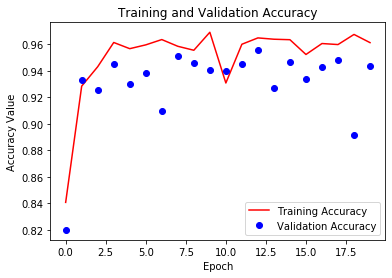

In [166]:
accuracy = model.history.history['accuracy']
val_accuracy = model.history.history['val_accuracy']

plt.figure()
plt.plot(range(len(accuracy)), accuracy, 'r', label='Training Accuracy')
plt.plot(range(len(val_accuracy)), val_accuracy, 'bo', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy Value')
plt.legend()
plt.show()

In [135]:
from keras.models import load_model
WIDTH = 256
HEIGHT = 256
model = unet(input_size=(WIDTH,HEIGHT,3), nr_classes=len(COLOR_DICT))
# model.load_weights("../../../Models/detect-tree/multi classes/1st-run-weights-improvement-18-0.1739.h5")
# model.load_weights('current-checkpoint.h5')
# model.load_weights('../../../Models/detect-tree/5th-run-128-256-weights-improvement-18-0.0959.h5')
model.load_weights('../../../Models/detect-tree/3rd-run-128-weights-improvement-08-0.2291.h5')

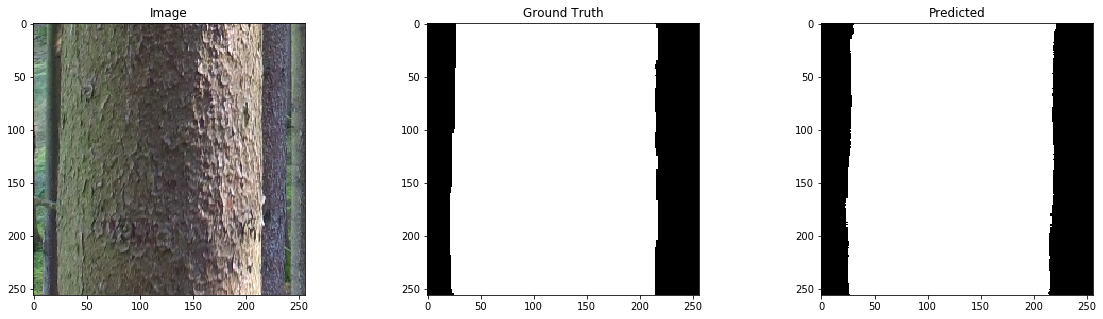

In [134]:
import matplotlib.pyplot as plt
sample_image, sample_mask = set_sample_image('DJI_032 - 2.JPG','DJI_032 - 2.png')
pred = show_predictions()

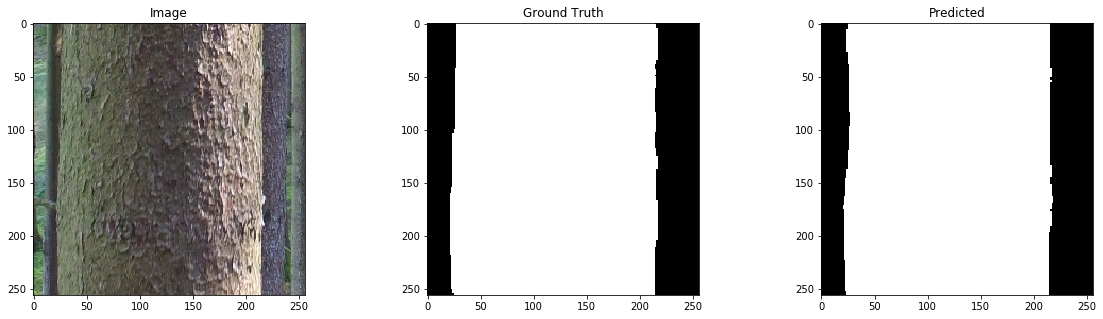

In [167]:
sample_image, sample_mask = set_sample_image('DJI_032 - 2.JPG','DJI_032 - 2.png')
pred = show_predictions()

In [60]:
data_gen_args = {}

myTestGen = trainGenerator(16 #20
                     ,'../../../Data/Masked Truncs/test/'
                     ,'image'
                     #,'label'
                     ,'mask'
                     ,data_gen_args
                     ,image_color_mode='rgb'
                     ,mask_color_mode='rgb'
                     ,target_size=(WIDTH,HEIGHT)
                     ,save_to_dir = None
                     ,flag_multi_class = True
                       )

test_model = model
results = test_model.evaluate_generator(myTestGen, steps=16, verbose=1)

Found 20 images belonging to 1 classes.
Found 20 images belonging to 1 classes.
16/16 [==============================] - 228s 14s/step


In [61]:
results

[0.054001856595277786, 0.9600753784179688, 0.2616429328918457]

In [163]:
results

[0.05395939573645592, 0.9567611813545227, 0.28269529342651367]

In [137]:
results

[0.198563814163208, 0.9385741949081421, 0.25]

In [111]:
results

[0.20633098483085632, 0.9324371218681335, 0.2504282593727112]

In [112]:
test_model.metrics_names

['loss', 'accuracy', 'mean_io_u_9']

In [65]:
pred = test_model.predict_generator(myTestGen, steps=1, verbose=1)

1/1 [==============================] - 6s 6s/step


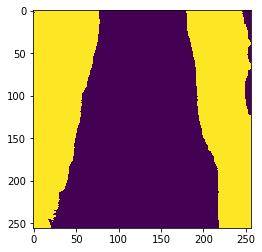

In [85]:
plt.imshow(pred[0,:,:,0]<0.5)

In [62]:
TEST_DIR='../../../Data/Masked Truncs/test/'

In [ ]:
# large images -> small weights
import glob
for (test_image, test_mask) in zip(glob.glob(TEST_DIR + '/image/*.jpg'), glob.glob(TEST_DIR + '/mask/*.png')):
    image_name = test_image.split('\\')[-1]
    mask_name = test_mask.split('\\')[-1]
    sample_image, sample_mask = set_sample_image(image_name,mask_name)
    pred = show_predictions()


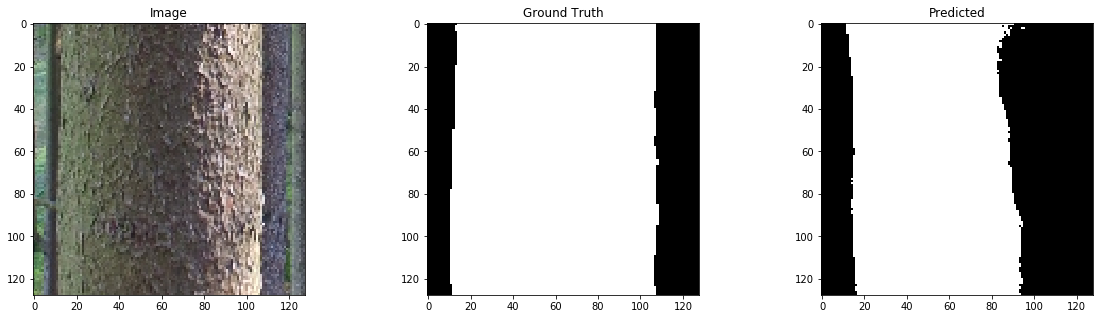

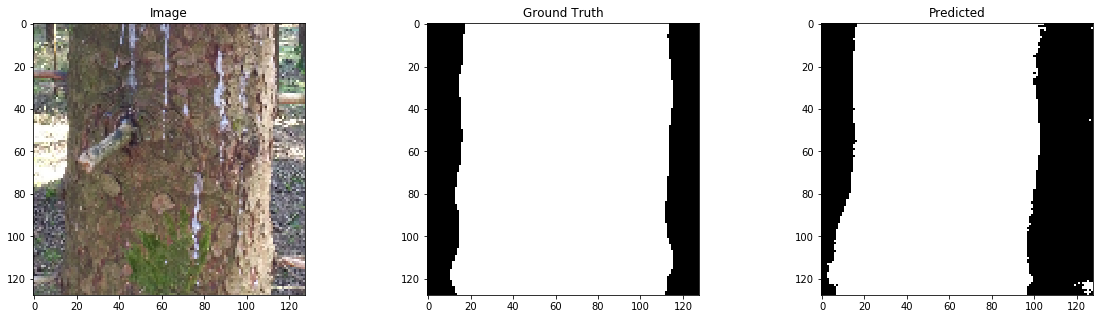

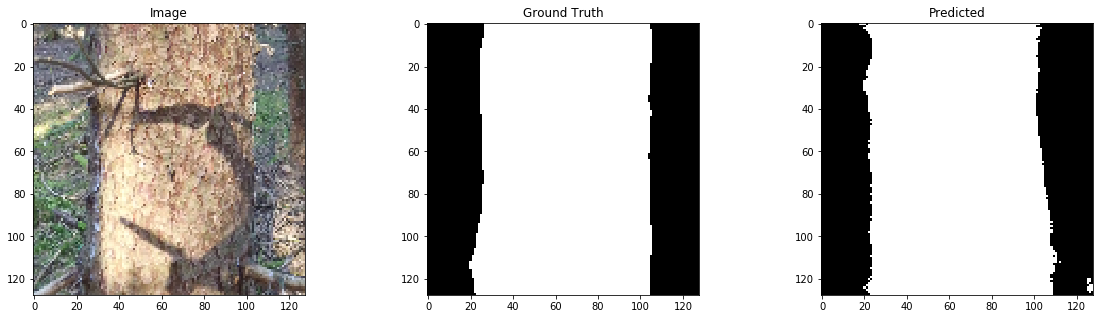

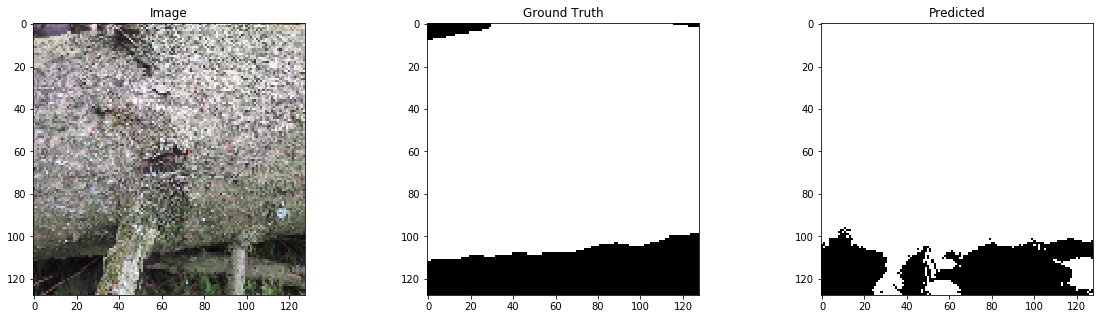

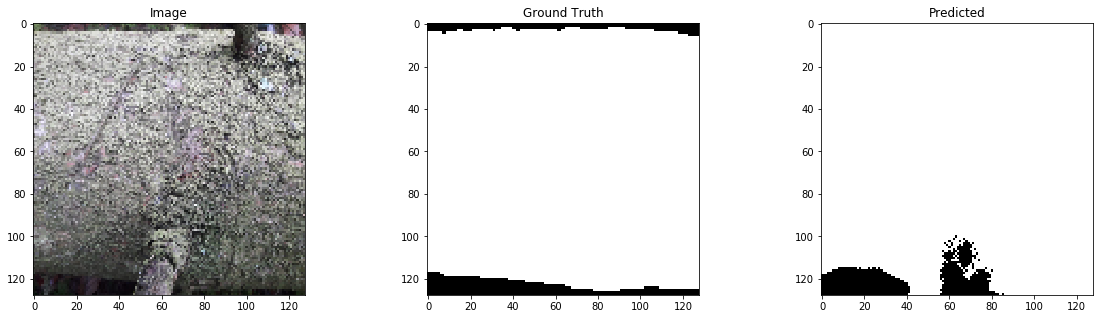

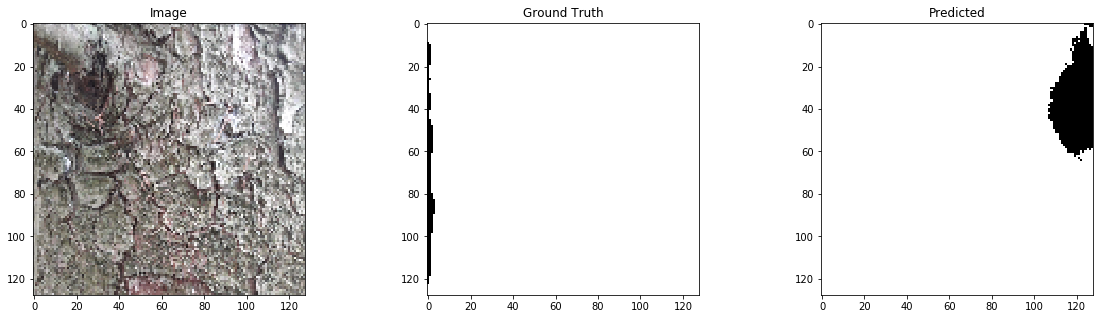

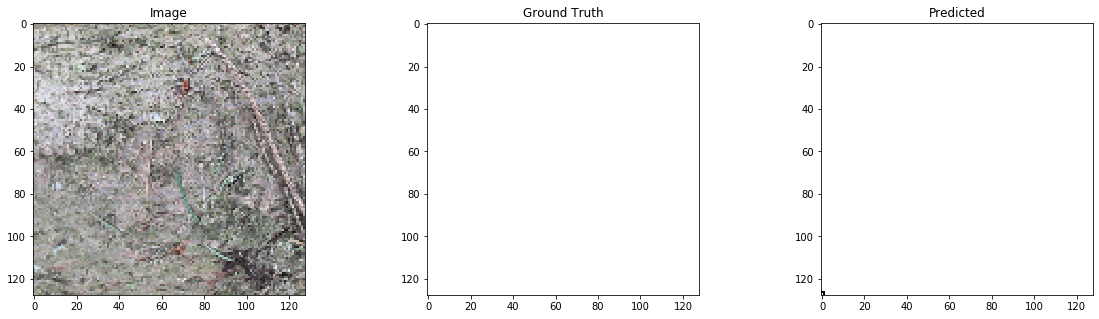

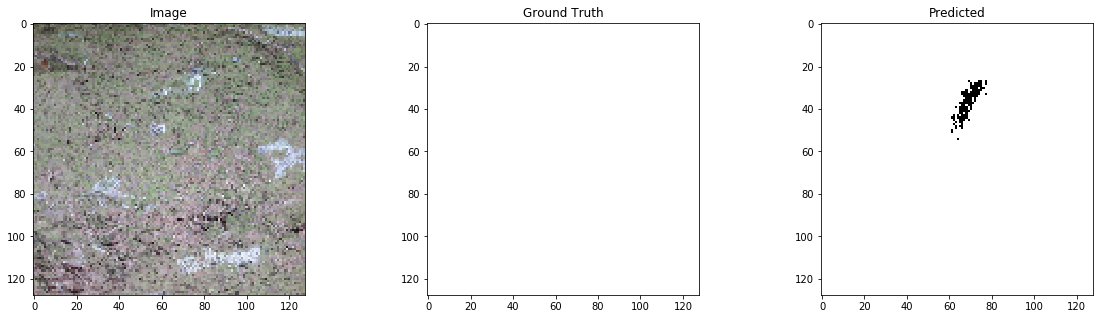

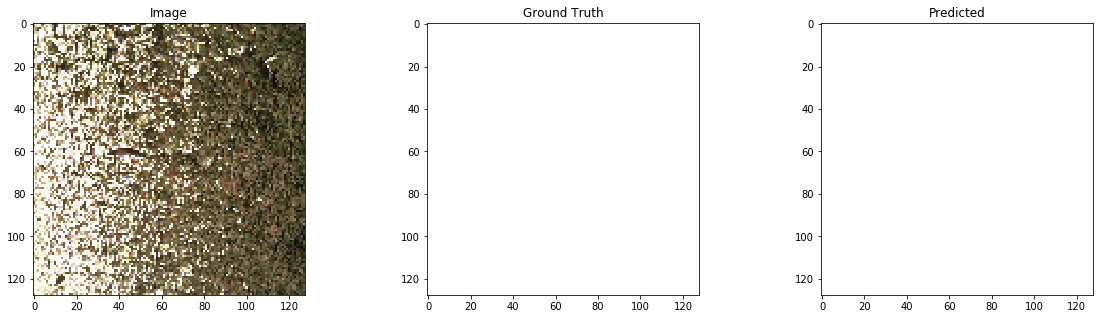

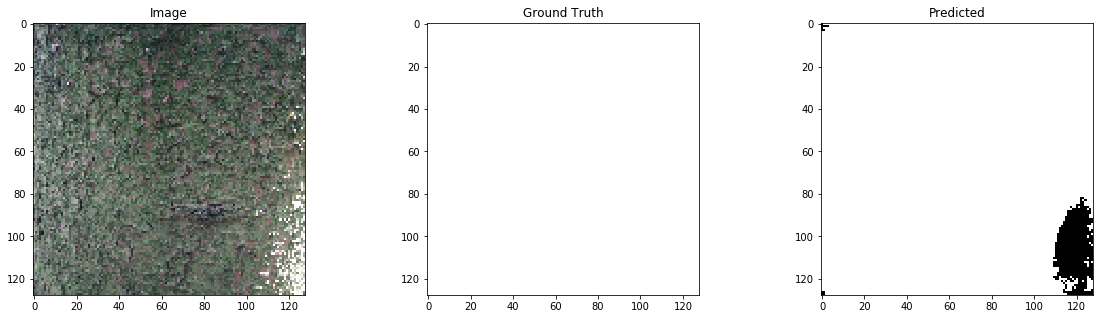

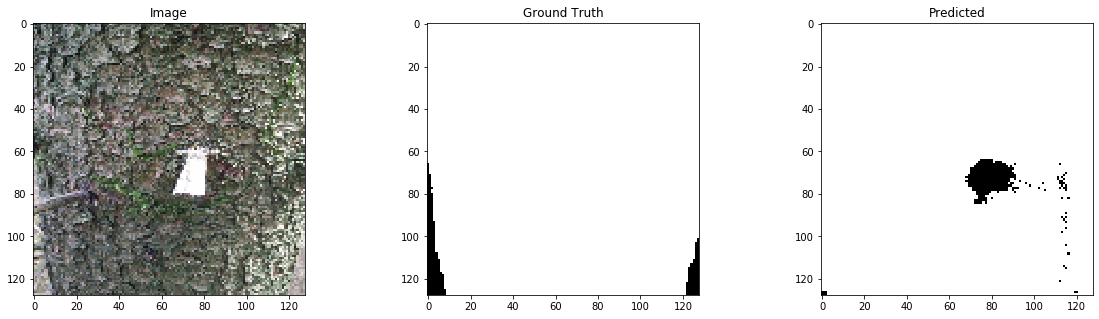

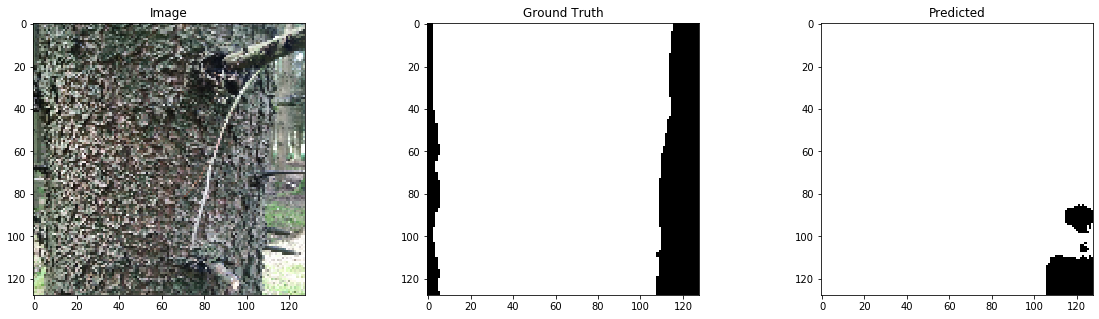

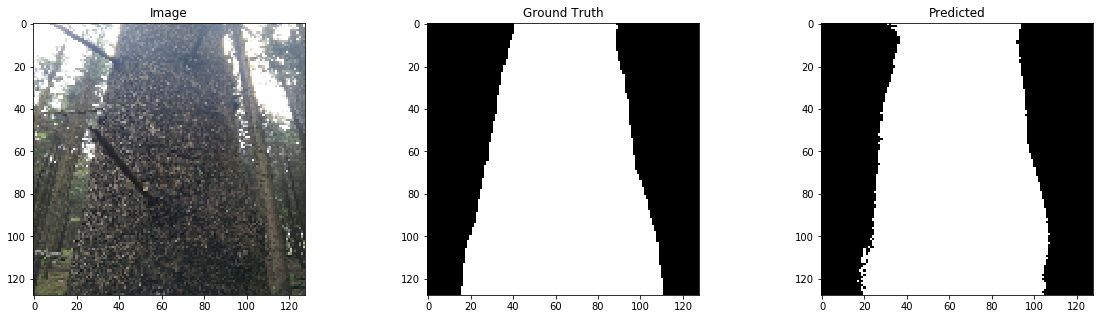

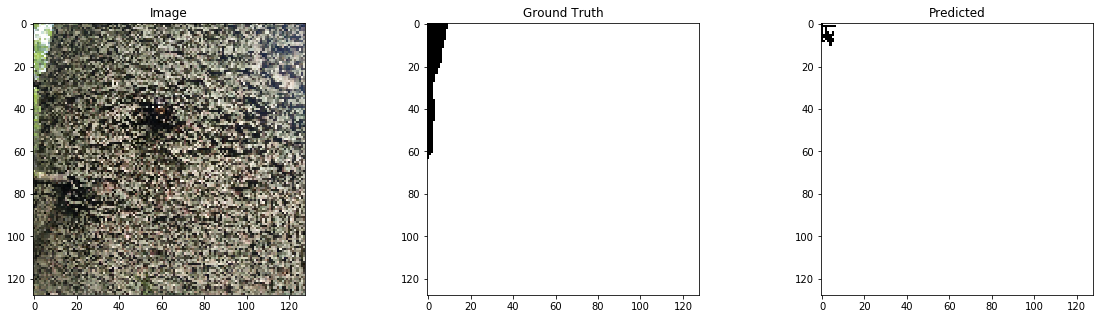

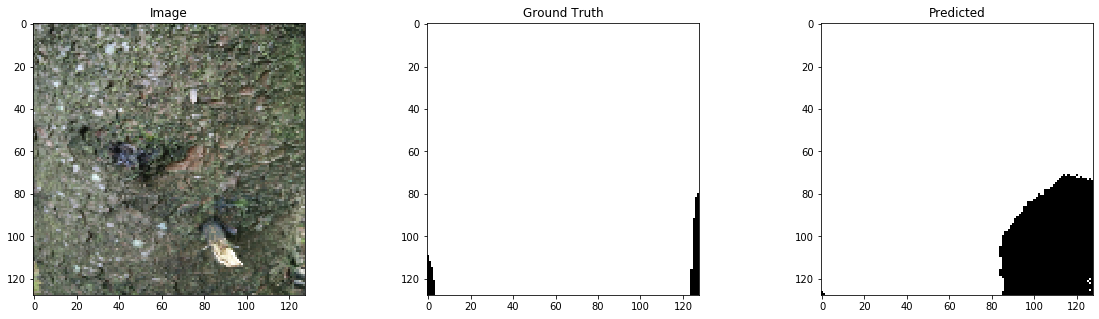

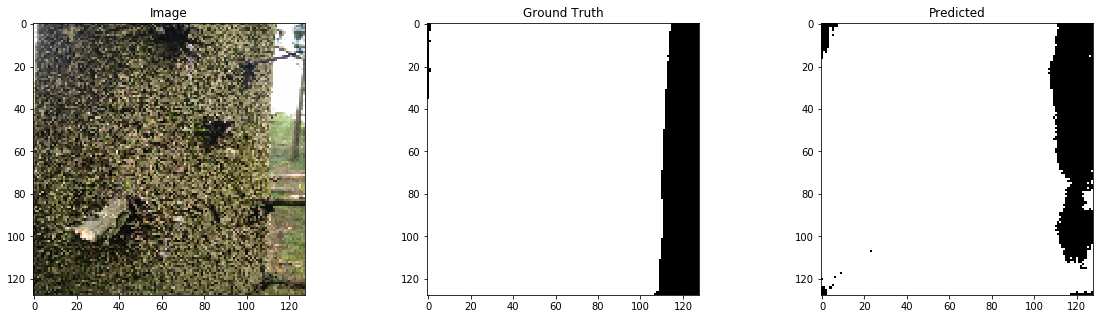

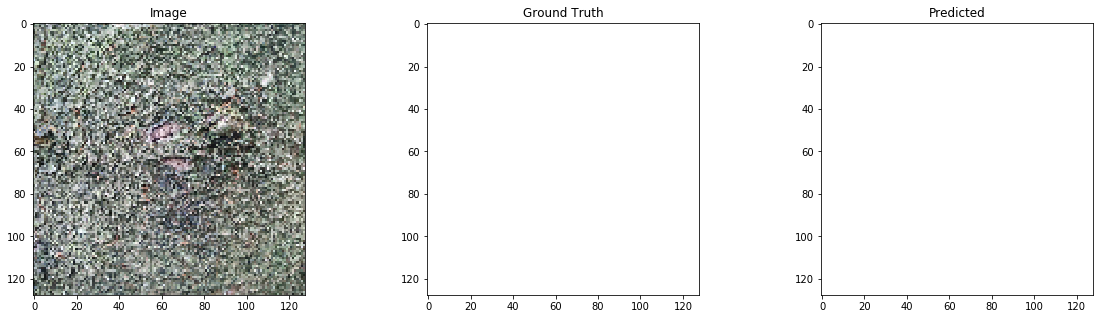

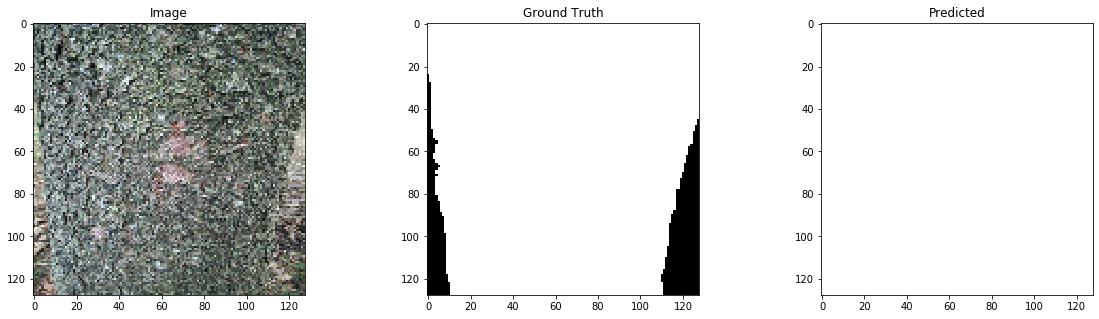

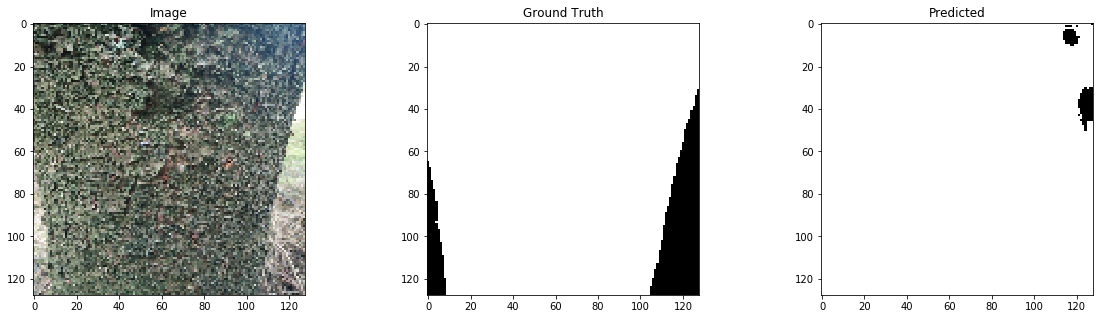

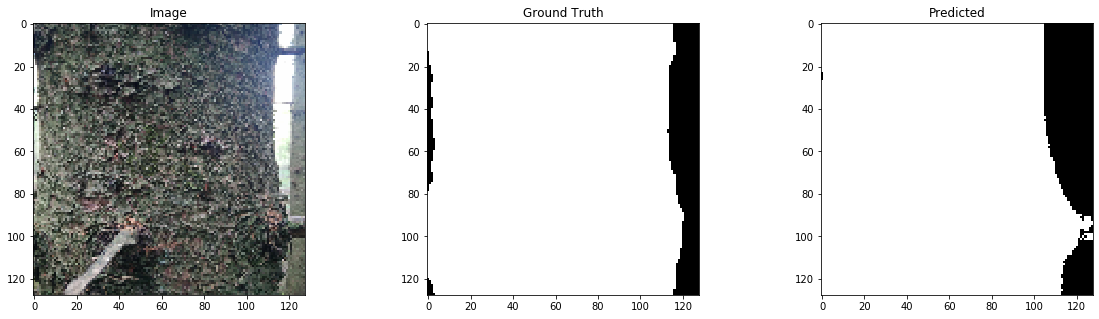

In [138]:
# small images large weights
import glob
for (test_image, test_mask) in zip(glob.glob(TEST_DIR + '/image/*.jpg'), glob.glob(TEST_DIR + '/mask/*.png')):
    image_name = test_image.split('\\')[-1]
    mask_name = test_mask.split('\\')[-1]
    sample_image, sample_mask = set_sample_image(image_name,mask_name)
    pred = show_predictions()


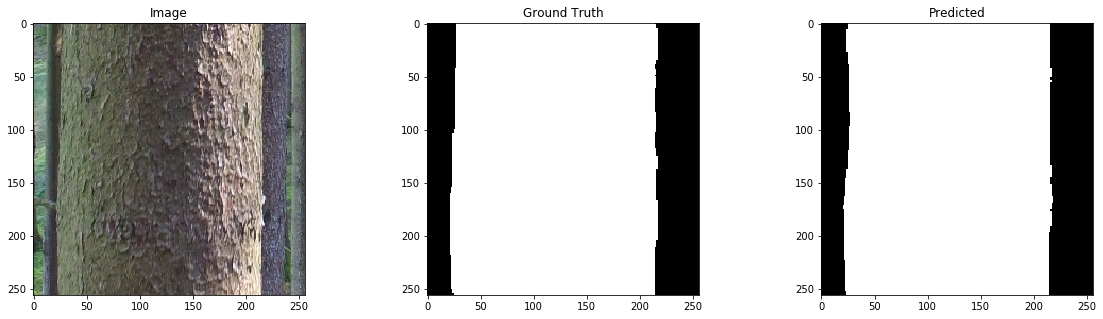

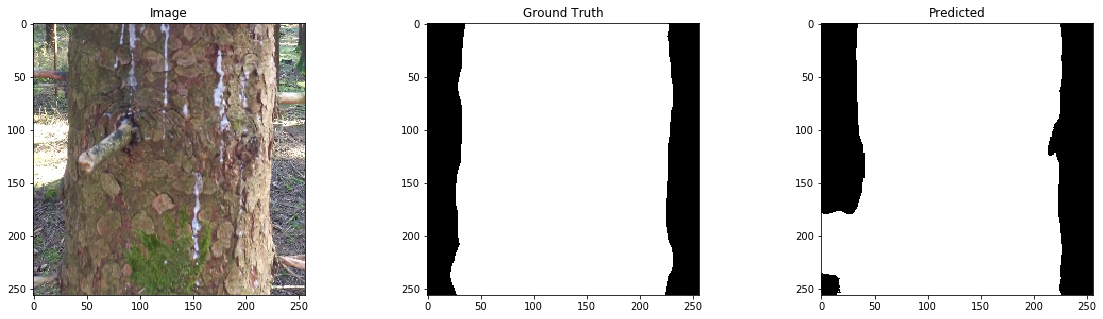

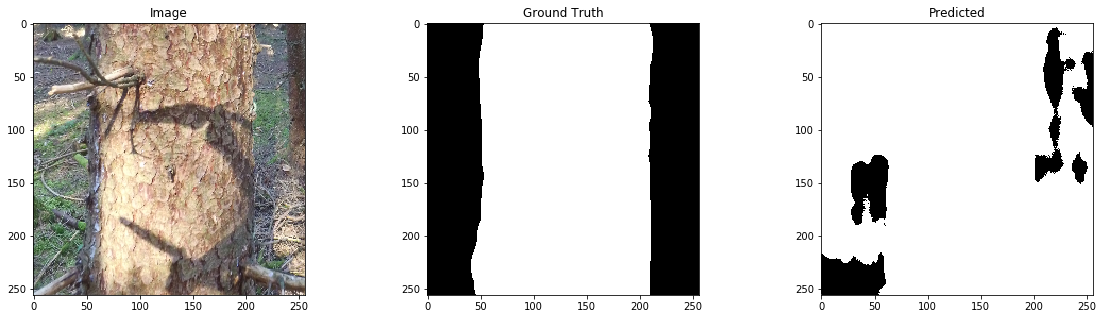

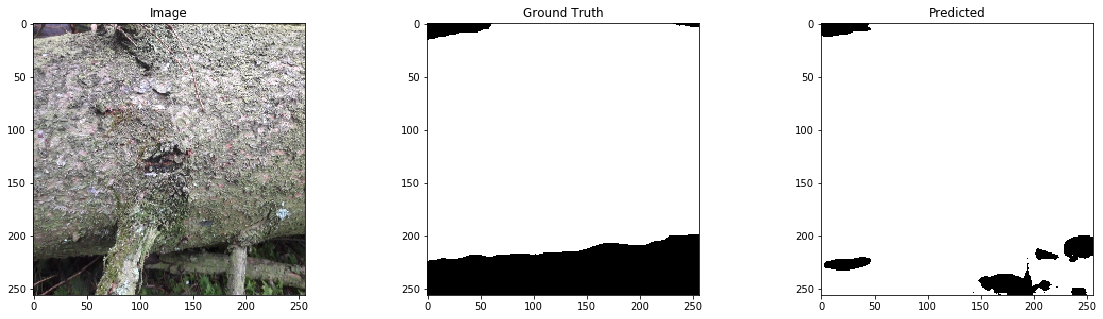

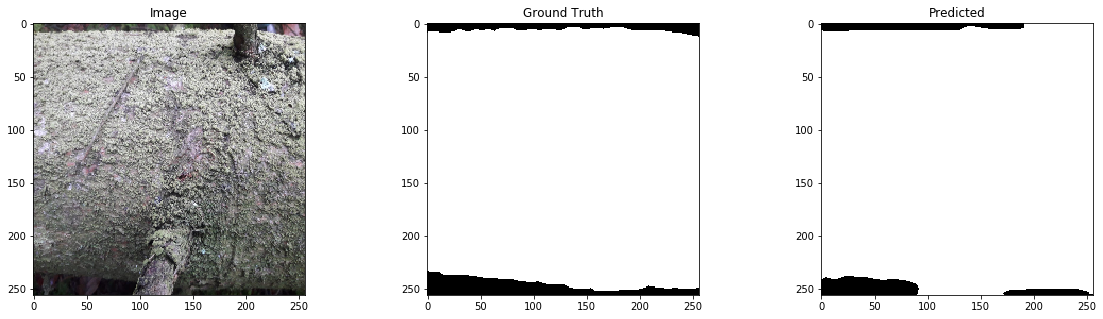

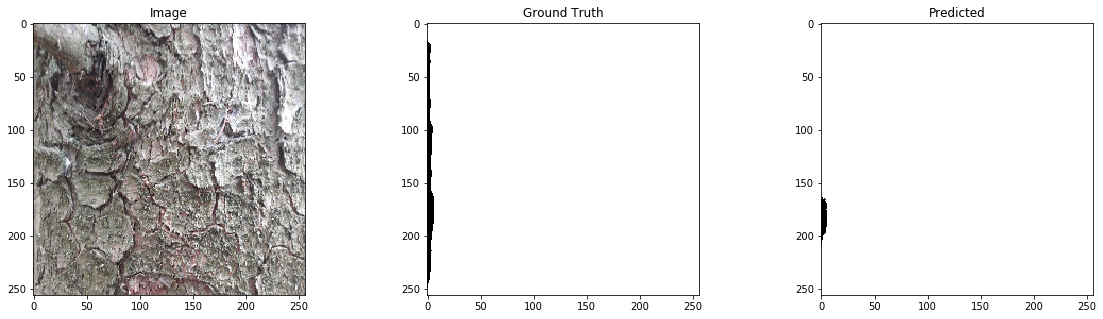

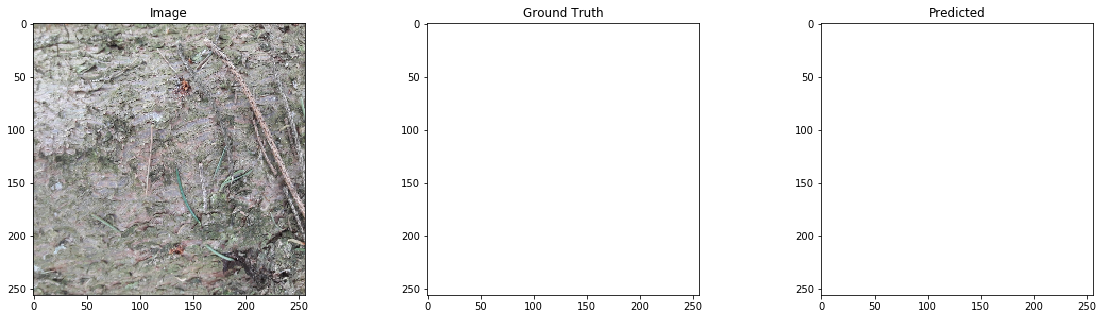

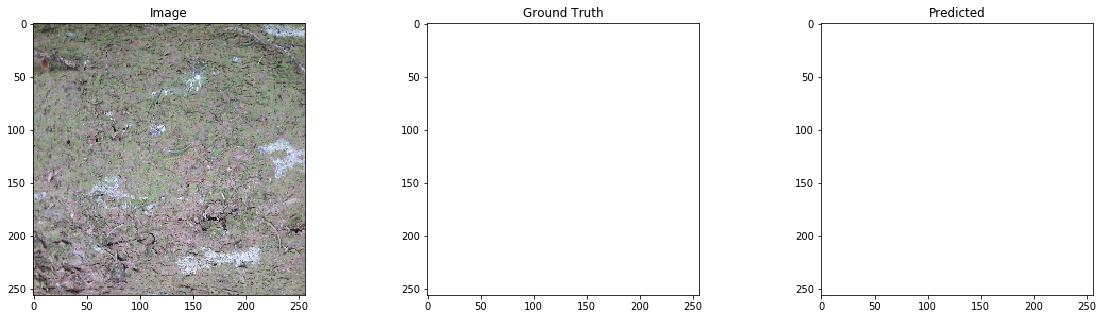

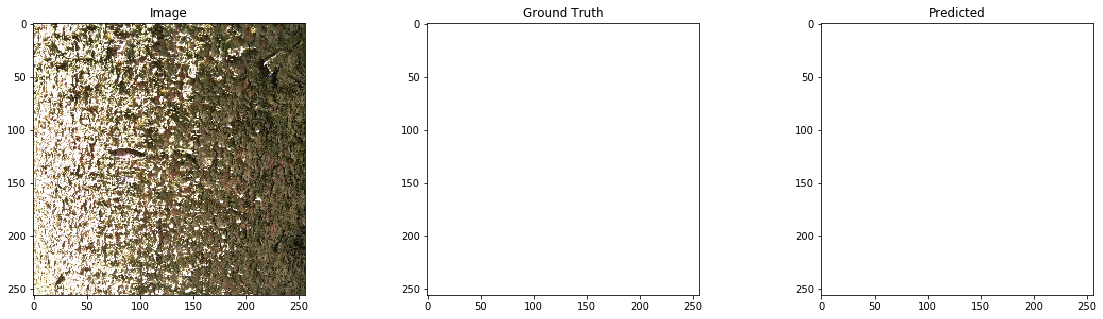

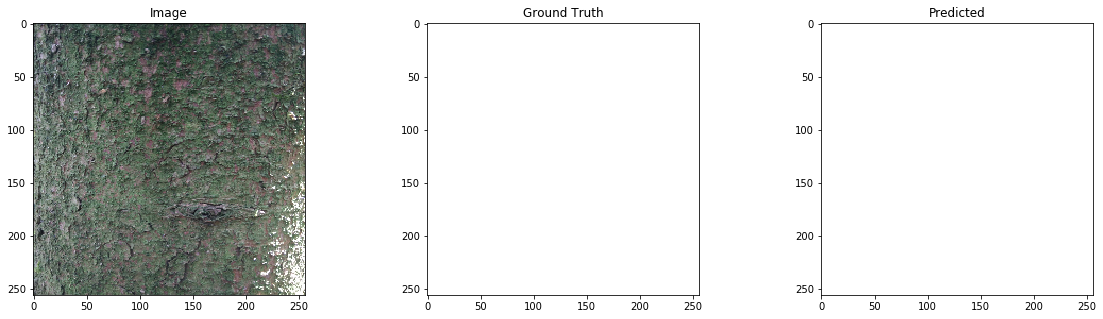

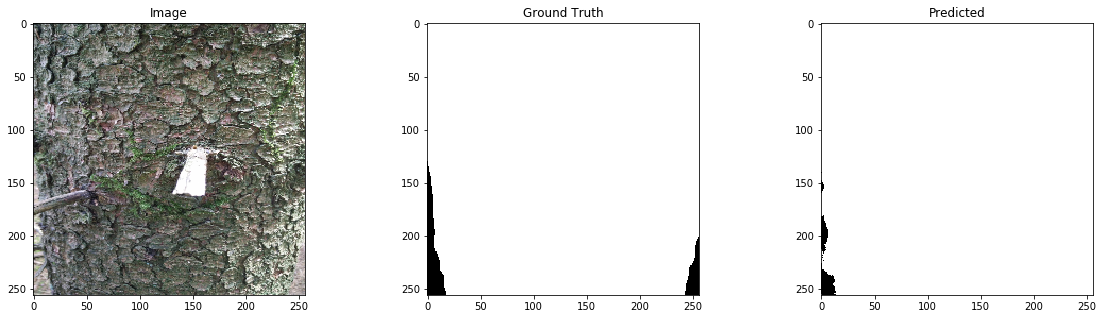

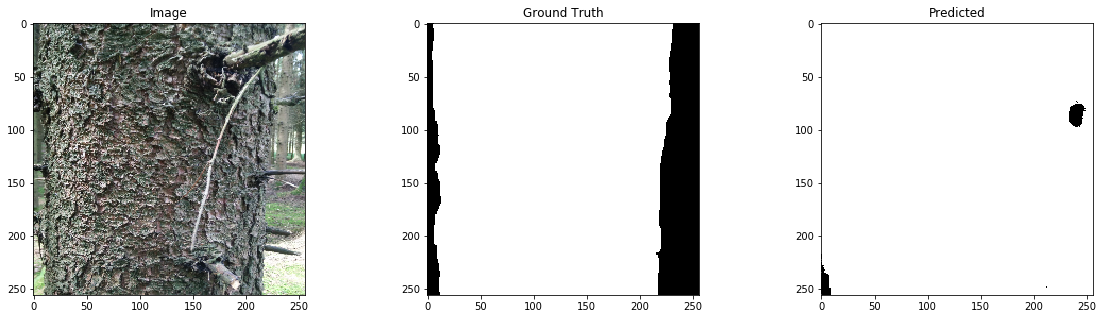

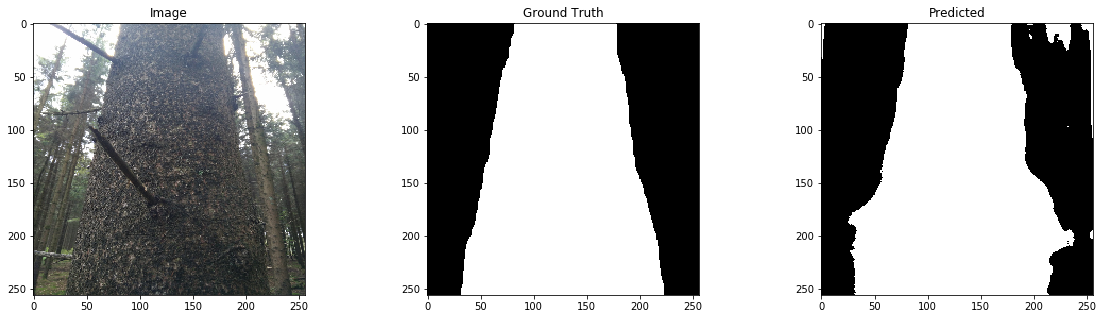

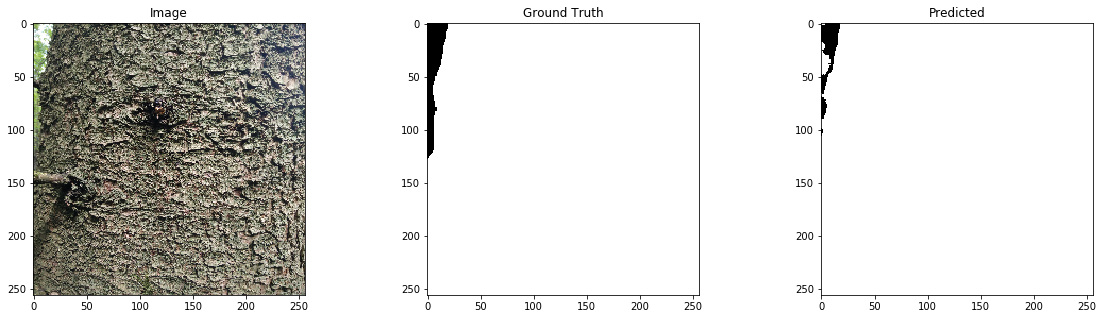

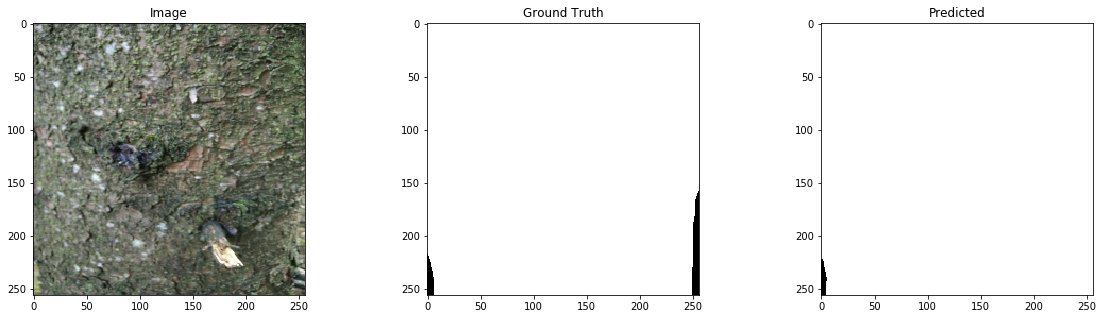

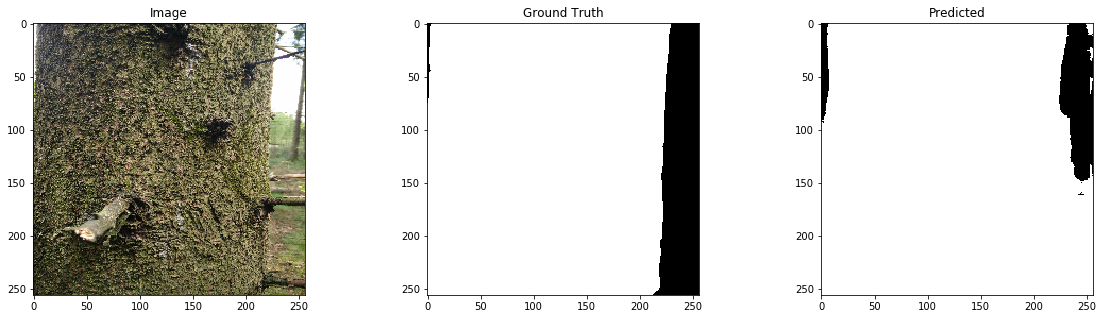

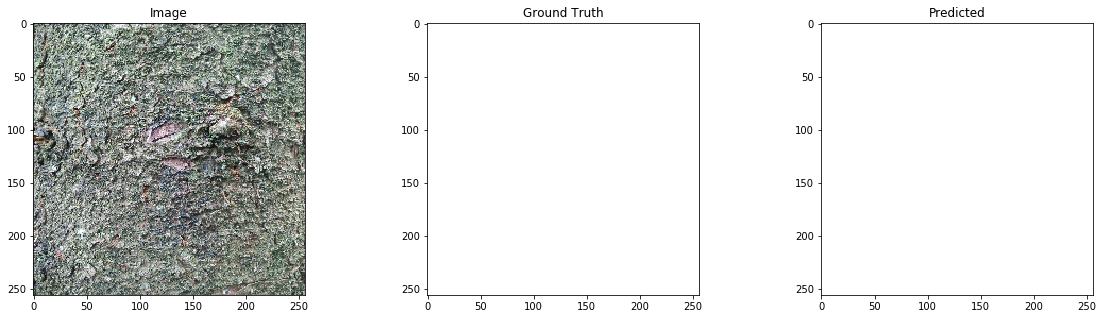

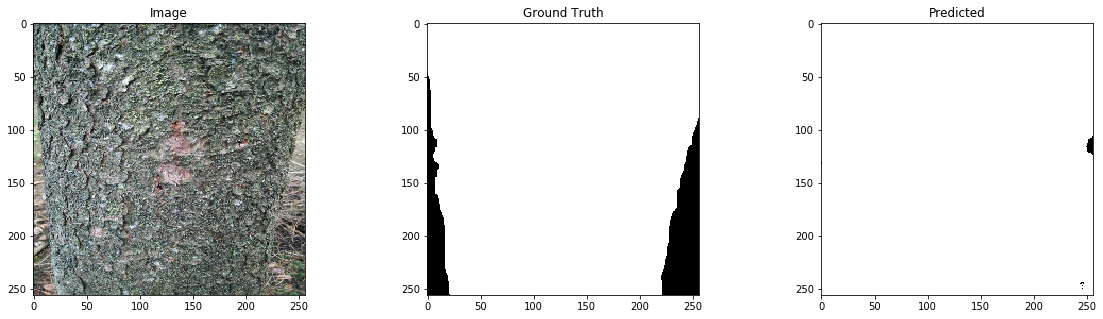

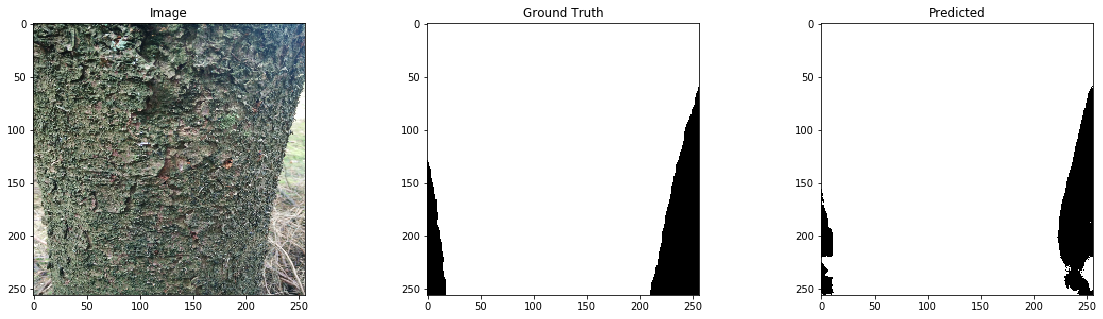

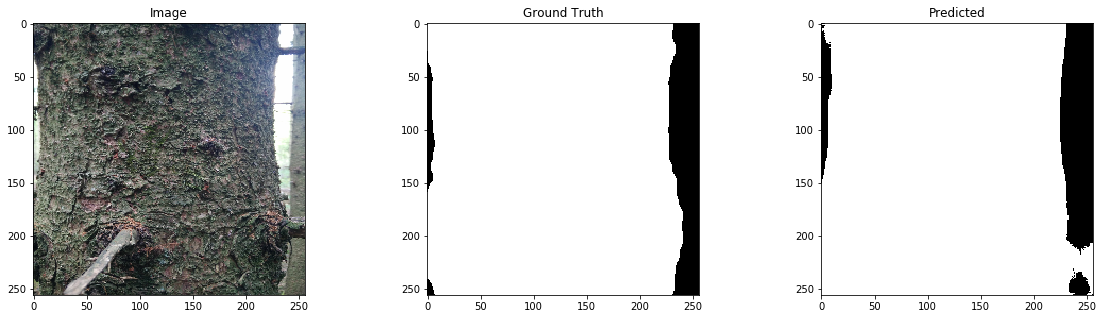

In [169]:
# large images, small -> large weights
import glob
for (test_image, test_mask) in zip(glob.glob(TEST_DIR + '/image/*.jpg'), glob.glob(TEST_DIR + '/mask/*.png')):
    image_name = test_image.split('\\')[-1]
    mask_name = test_mask.split('\\')[-1]
    sample_image, sample_mask = set_sample_image(image_name,mask_name)
    pred = show_predictions()
